# **Torch Tensors in 1D**

## **Table of Contents**

In this lab, you will learn the basics of tensor operations. Tensors are an essential part of PyTorch; there are complex mathematical objects in and of themselves. Fortunately, most of the intricacies are not necessary. In this section, you will compare them to vectors and numpy arrays.

- Types and Shape
- Indexing and Slicing
- Tensor Functions
- Tensor Operations

# **Preparation**

In [1]:
# These are the libraries will be used for this lab.

import torch
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# Check PyTorch version:
torch.__version__

'2.5.1+cu124'

This is the function for plotting diagrams. You will use this function to plot the vectors in Coordinate system.

In [5]:
# Plot vecotrs, please keep the parameters in the same length
# @param: Vectors = [{"vector": vector variable, "name": name of vector, "color": color of the vector on diagram}]

def plotVec(vectors):
    ax = plt.axes()

    # For loop to draw the vectors
    for vec in vectors:
        ax.arrow(0, 0, *vec["vector"], head_width = 0.05,color = vec["color"], head_length = 0.1)
        plt.text(*(vec["vector"] + 0.1), vec["name"])

    plt.ylim(-2,2)
    plt.xlim(-2,2)

# **Types and Shape**


You can find the type of the following list of integers [0, 1, 2, 3, 4] by applying the constructor torch.tensor():

In [6]:
# Convert a integer list with length 5 to a tensor

ints_to_tensor = torch.tensor([0, 1, 2, 3, 4])
print("The dtype of tensor object after converting it to tensor: ", ints_to_tensor.dtype)
print("The type of tensor object after converting it to tensor: ", ints_to_tensor.type())

The dtype of tensor object after converting it to tensor:  torch.int64
The type of tensor object after converting it to tensor:  torch.LongTensor


As a result, the integer list has been converted to a long tensor.







The Python type is still torch.Tensor:

In [7]:
type(ints_to_tensor)

torch.Tensor








You can find the type of this float list [0.0, 1.0, 2.0, 3.0, 4.0] by applying the method torch.tensor():

In [8]:
# Convert a float list with length 5 to a tensor

floats_to_tensor = torch.tensor([0.0, 1.0, 2.0, 3.0, 4.0])
print("The dtype of tensor object after converting it to tensor: ", floats_to_tensor.dtype)
print("The type of tensor object after converting it to tensor: ", floats_to_tensor.type())

The dtype of tensor object after converting it to tensor:  torch.float32
The type of tensor object after converting it to tensor:  torch.FloatTensor


The float list is converted to a float tensor.

In [9]:
list_floats=[0.0, 1.0, 2.0, 3.0, 4.0]

floats_int_tensor=torch.tensor(list_floats,dtype=torch.int64)

In [10]:
print("The dtype of tensor object is: ", floats_int_tensor.dtype)
print("The type of tensor object is: ", floats_int_tensor.type())

The dtype of tensor object is:  torch.int64
The type of tensor object is:  torch.LongTensor


**Note: The elements in the list that will be converted to tensor must have the same type.**

- From the previous examples, you see that torch.tensor() converts the list to the tensor type, which is similar to the original list type. However, what if you want to convert the list to a certain tensor type? torch contains the methods required to do this conversion. The following code converts an integer list to float tensor:

In [11]:
# Convert a integer list with length 5 to float tensor

new_float_tensor = torch.FloatTensor([0, 1, 2, 3, 4])
new_float_tensor.type()
print("The type of the new_float_tensor:", new_float_tensor.type())

The type of the new_float_tensor: torch.FloatTensor


In [12]:
new_float_tensor = torch.FloatTensor([0, 1, 2, 3, 4])

You can also convert an existing tensor object (tensor_obj) to another tensor type. Convert the integer tensor to a float tensor:

In [13]:
# Another method to convert the integer list to float tensor

old_int_tensor = torch.tensor([0, 1, 2, 3, 4])
new_float_tensor = old_int_tensor.type(torch.FloatTensor)
print("The type of the new_float_tensor:", new_float_tensor.type())

The type of the new_float_tensor: torch.FloatTensor



The tensor_obj.size() helps you to find out the size of the tensor_obj. The tensor_obj.ndimension() shows the dimension of the tensor object

In [14]:
# Introduce the tensor_obj.size() & tensor_ndimension.size() methods

print("The size of the new_float_tensor: ", new_float_tensor.size())
print("The dimension of the new_float_tensor: ",new_float_tensor.ndimension())

The size of the new_float_tensor:  torch.Size([5])
The dimension of the new_float_tensor:  1


- The tensor_obj.view(row, column) is used for reshaping a tensor object.

What if you have a tensor object with torch.Size([5]) as a new_float_tensor as shown in the previous example?
- After you execute new_float_tensor.view(5, 1), the size of new_float_tensor will be torch.Size([5, 1]).
- This means that the tensor object new_float_tensor has been reshaped from a one-dimensional tensor object with 5 elements to a two-dimensional tensor object with 5 rows and 1 column.

In [15]:
# Introduce the tensor_obj.view(row, column) method

twoD_float_tensor = new_float_tensor.view(5, 1)
print("Original Size: ", new_float_tensor.size())
print("Size after view method", twoD_float_tensor.size())

Original Size:  torch.Size([5])
Size after view method torch.Size([5, 1])


- Note that the original size is 5. The tensor after reshaping becomes a 5X1 tensor analog to a column vector.

- Note: The number of elements in a tensor must remain constant after applying view.







- What if you have a tensor with dynamic size but you want to reshape it? You can use -1 to do just that.

# Introduce the use of -1 in tensor_obj.view(row, column) method


In [16]:

twoD_float_tensor = new_float_tensor.view(-1, 1)
print("Original Size: ", new_float_tensor.size())
print("Size after view method", twoD_float_tensor.size())

Original Size:  torch.Size([5])
Size after view method torch.Size([5, 1])


You get the same result as the previous example. The -1 can represent any size. However, be careful because you can set only one argument as -1.







You can also convert a numpy array to a tensor, for example:

In [17]:
# Convert a numpy array to a tensor

numpy_array = np.array([0.0, 1.0, 2.0, 3.0, 4.0])
new_tensor = torch.from_numpy(numpy_array)

print("The dtype of new tensor: ", new_tensor.dtype)
print("The type of new tensor: ", new_tensor.type())

The dtype of new tensor:  torch.float64
The type of new tensor:  torch.DoubleTensor


In [18]:
# Converting a tensor to a numpy is also supported in PyTorch. The syntax is shown below:
# Convert a tensor to a numpy array

back_to_numpy = new_tensor.numpy()
print("The numpy array from tensor: ", back_to_numpy)
print("The dtype of numpy array: ", back_to_numpy.dtype)

The numpy array from tensor:  [0. 1. 2. 3. 4.]
The dtype of numpy array:  float64


back_to_numpy and new_tensor still point to numpy_array. As a result if we change numpy_array both back_to_numpy and new_tensor will change. For example if we set all the elements in numpy_array to zeros, back_to_numpy and  new_tensor will follow suit.

In [19]:
# Set all elements in numpy array to zero
numpy_array[:] = 0
print("The new tensor points to numpy_array : ", new_tensor)
print("and back to numpy array points to the tensor: ", back_to_numpy)

The new tensor points to numpy_array :  tensor([0., 0., 0., 0., 0.], dtype=torch.float64)
and back to numpy array points to the tensor:  [0. 0. 0. 0. 0.]


Pandas Series can also be converted by using the numpy array that is stored in pandas_series.values. Note that pandas_series can be any pandas_series object.

In [20]:
# Convert a panda series to a tensor

pandas_series=pd.Series([0.1, 2, 0.3, 10.1])
new_tensor=torch.from_numpy(pandas_series.values)
print("The new tensor from numpy array: ", new_tensor)
print("The dtype of new tensor: ", new_tensor.dtype)
print("The type of new tensor: ", new_tensor.type())

The new tensor from numpy array:  tensor([ 0.1000,  2.0000,  0.3000, 10.1000], dtype=torch.float64)
The dtype of new tensor:  torch.float64
The type of new tensor:  torch.DoubleTensor


consider the following tensor

In [21]:
this_tensor=torch.tensor([0,1, 2,3])

In [22]:
this_tensor=torch.tensor([0,1, 2,3])

print("the first item is given by",this_tensor[0].item(),"the first tensor value is given by ",this_tensor[0])
print("the second item is given by",this_tensor[1].item(),"the second tensor value is given by ",this_tensor[1])
print("the third  item is given by",this_tensor[2].item(),"the third tensor value is given by ",this_tensor[2])

the first item is given by 0 the first tensor value is given by  tensor(0)
the second item is given by 1 the second tensor value is given by  tensor(1)
the third  item is given by 2 the third tensor value is given by  tensor(2)


we can use the method  tolist() to return a list

In [23]:
torch_to_list=this_tensor.tolist()

print('tensor:', this_tensor,"\nlist:",torch_to_list)

tensor: tensor([0, 1, 2, 3]) 
list: [0, 1, 2, 3]


# **Indexing and Slicing**

In Python, the index starts with 0. Therefore, the last index will always be 1 less than the length of the tensor object. You can access the value on a certain index by using the square bracket, for example

In [24]:
# A tensor for showing how the indexs work on tensors

index_tensor = torch.tensor([0, 1, 2, 3, 4])
print("The value on index 0:",index_tensor[0])
print("The value on index 1:",index_tensor[1])
print("The value on index 2:",index_tensor[2])
print("The value on index 3:",index_tensor[3])
print("The value on index 4:",index_tensor[4])

The value on index 0: tensor(0)
The value on index 1: tensor(1)
The value on index 2: tensor(2)
The value on index 3: tensor(3)
The value on index 4: tensor(4)


Note that the index_tensor[5] will create an error.

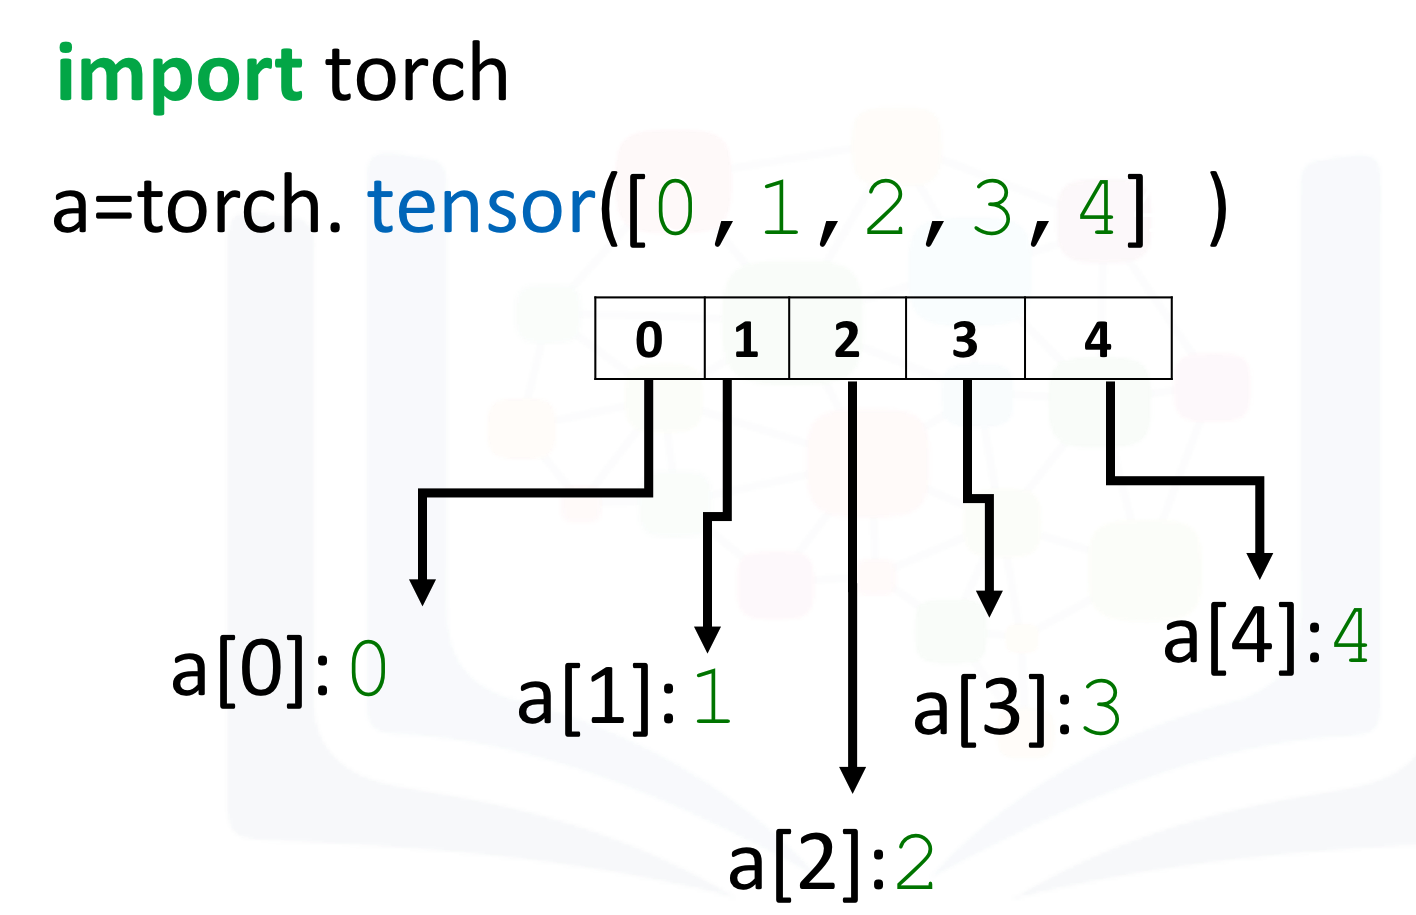

Now, you'll see how to change the values on certain indexes.







Suppose you have a tensor as shown here:

In [25]:
  # A tensor for showing how to change value according to the index

tensor_sample = torch.tensor([20, 1, 2, 3, 4])

Assign the value on index 0 as 100:

In [26]:
# Change the value on the index 0 to 100

print("Inital value on index 0:", tensor_sample[0])
tensor_sample[0] = 100
print("Modified tensor:", tensor_sample)

Inital value on index 0: tensor(20)
Modified tensor: tensor([100,   1,   2,   3,   4])


As you can see, the value on index 0 changes. Change the value on index 4 to 0:

In [27]:
# Change the value on the index 4 to 0

print("Inital value on index 4:", tensor_sample[4])
tensor_sample[4] = 0
print("Modified tensor:", tensor_sample)

Inital value on index 4: tensor(4)
Modified tensor: tensor([100,   1,   2,   3,   0])


The value on index 4 turns to 0.

If you are familiar with Python, you know that there is a feature called slicing on a list. Tensors support the same feature.

Get the subset of tensor_sample. The subset should contain the values in tensor_sample from index 1 to index 3.

In [28]:
# Slice tensor_sample

subset_tensor_sample = tensor_sample[1:4]
print("Original tensor sample: ", tensor_sample)
print("The subset of tensor sample:", subset_tensor_sample)

Original tensor sample:  tensor([100,   1,   2,   3,   0])
The subset of tensor sample: tensor([1, 2, 3])


- As a result, the subset_tensor_sample returned only the values on index 1, index 2, and index 3. Then, it stored them in a subset_tensor_sample.

- Note: The number on the left side of the colon represents the index of the first value. The number on the right side of the colon is always 1 larger than the index of the last value. For example, tensor_sample[1:4] means you get values from the index 1 to index 3 (4-1).

As for assigning values to the certain index, you can also assign the value to the slices:







- Change the value of tensor_sample from index 3 to index 4:

In [29]:
# Change the values on index 3 and index 4

print("Inital value on index 3 and index 4:", tensor_sample[3:5])
tensor_sample[3:5] = torch.tensor([300.0, 400.0])
print("Modified tensor:", tensor_sample)

Inital value on index 3 and index 4: tensor([3, 0])
Modified tensor: tensor([100,   1,   2, 300, 400])


- The values on both index 3 and index 4 were changed. The values on other indexes remain the same.

- You can also use a variable to contain the selected indexes and pass that variable to a tensor slice operation as a parameter, for example:

In [30]:
# Using variable to contain the selected index, and pass it to slice operation

selected_indexes = [3, 4]
subset_tensor_sample = tensor_sample[selected_indexes]
print("The inital tensor_sample", tensor_sample)
print("The subset of tensor_sample with the values on index 3 and 4: ", subset_tensor_sample)

The inital tensor_sample tensor([100,   1,   2, 300, 400])
The subset of tensor_sample with the values on index 3 and 4:  tensor([300, 400])


In [31]:
# You can also assign one value to the selected indexes by using the variable. For example, assign 100,000 to all the selected_indexes:
#Using variable to assign the value to the selected indexes

print("The inital tensor_sample", tensor_sample)
selected_indexes = [1, 3]
tensor_sample[selected_indexes] = 100000
print("Modified tensor with one value: ", tensor_sample)

The inital tensor_sample tensor([100,   1,   2, 300, 400])
Modified tensor with one value:  tensor([   100, 100000,      2, 100000,    400])


- The values on index 1 and index 3 were changed to 100,000. Others remain the same.







- Note: You can use only one value for the assignment.

# **Tensor Functions**

**Mean and Standard Deviation**

- You'll review the mean and standard deviation methods first. They are two basic statistical methods.

- Create a tensor with values [1.0, -1, 1, -1]:

In [32]:
# Sample tensor for mathmatic calculation methods on tensor

math_tensor = torch.tensor([1.0, -1.0, 1, -1])
print("Tensor example: ", math_tensor)

Tensor example:  tensor([ 1., -1.,  1., -1.])


In [33]:
#Calculate the mean for math_tensor

mean = math_tensor.mean()
print("The mean of math_tensor: ", mean)

The mean of math_tensor:  tensor(0.)


In [34]:
#Calculate the standard deviation for math_tensor

standard_deviation = math_tensor.std()
print("The standard deviation of math_tensor: ", standard_deviation)

The standard deviation of math_tensor:  tensor(1.1547)


**Max and Min**

- Now, you'll review another two useful methods: tensor_obj.max() and tensor_obj.min(). These two methods are used for finding the maximum value and the minimum value in the tensor.



In [35]:
# Sample for introducing max and min methods

max_min_tensor = torch.tensor([1, 1, 3, 5, 5])
print("Tensor example: ", max_min_tensor)

Tensor example:  tensor([1, 1, 3, 5, 5])


- Note: There are two minimum numbers as 1 and two maximum numbers as 5 in the tensor. Can you guess how PyTorch is going to deal with the duplicates?

- Apply tensor_obj.max() on max_min_tensor:

In [36]:
# Method for finding the maximum value in the tensor

max_val = max_min_tensor.max()
print("Maximum number in the tensor: ", max_val)

Maximum number in the tensor:  tensor(5)


In [37]:
 max_min_tensor.max()

tensor(5)

In [38]:
# Method for finding the minimum value in the tensor

min_val = max_min_tensor.min()
print("Minimum number in the tensor: ", min_val)

Minimum number in the tensor:  tensor(1)


**Sin**
- Sin is the trigonometric function of an angle. Again, you will not be introducedvto any mathematic functions. You'll focus on Python.

- Create a tensor with 0, π/2 and π. Then, apply the sin function on the tensor. Notice here that the sin() is not a method of tensor object but is a function of torch:

In [39]:
# Method for calculating the sin result of each element in the tensor

pi_tensor = torch.tensor([0, np.pi/2, np.pi])
sin = torch.sin(pi_tensor)
print("The sin result of pi_tensor: ", sin)

The sin result of pi_tensor:  tensor([ 0.0000e+00,  1.0000e+00, -8.7423e-08])


The resultant tensor sin contains the result of the sin function applied to each element in the pi_tensor.
This is different from the previous methods. For tensor_obj.mean(), tensor_obj.std(), tensor_obj.max(), and tensor_obj.min(), the result is a tensor with only one number because these are aggregate methods.
However, the torch.sin() is not. Therefore, the resultant tensors have the same length as the input tensor.

- **Create Tensor by torch.linspace()**
- A useful function for plotting mathematical functions is torch.linspace(). torch.linspace() returns evenly spaced numbers over a specified interval. You specify the starting point of the sequence and the ending point of the sequence. The parameter steps indicates the number of samples to generate. Now, you'll work with steps = 5.

In [40]:
# First try on using linspace to create tensor

len_5_tensor = torch.linspace(-2, 2, steps = 5)
print ("First Try on linspace", len_5_tensor)

First Try on linspace tensor([-2., -1.,  0.,  1.,  2.])


In [41]:
# Assign steps with 9:
# Second try on using linspace to create tensor

len_9_tensor = torch.linspace(-2, 2, steps = 9)
print ("Second Try on linspace", len_9_tensor)

Second Try on linspace tensor([-2.0000, -1.5000, -1.0000, -0.5000,  0.0000,  0.5000,  1.0000,  1.5000,
         2.0000])


Use both torch.linspace() and torch.sin() to construct a tensor that contains the 100 sin result in range from 0 (0 degree) to 2π (360 degree):

In [42]:
# Construct the tensor within 0 to 360 degree

pi_tensor = torch.linspace(0, 2*np.pi, 100)
sin_result = torch.sin(pi_tensor)

Plot the result to get a clearer picture. You must cast the tensor to a numpy array before plotting it.

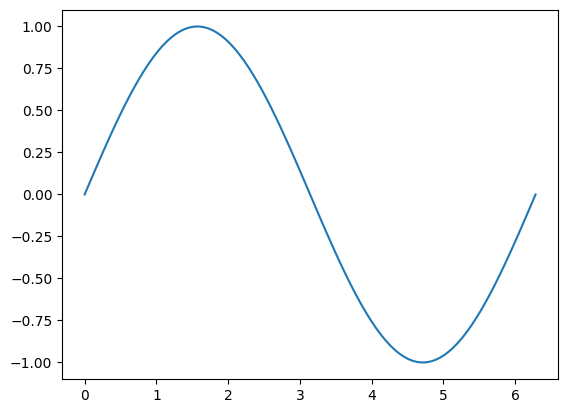

In [43]:
# Plot sin_result

plt.plot(pi_tensor.numpy(), sin_result.numpy())

# **Tensor Operations**

- **Tensor Addition**
- You can perform addition between two tensors.

- Create a tensor u with 1 dimension and 2 elements. Then, create another tensor v with the same number of dimensions and the same number of elements:

In [44]:
# Create two sample tensors

u = torch.tensor([1, 0])
v = torch.tensor([0, 1])

In [45]:
# Add u and v

w = u + v
print("The result tensor: ", w)

The result tensor:  tensor([1, 1])


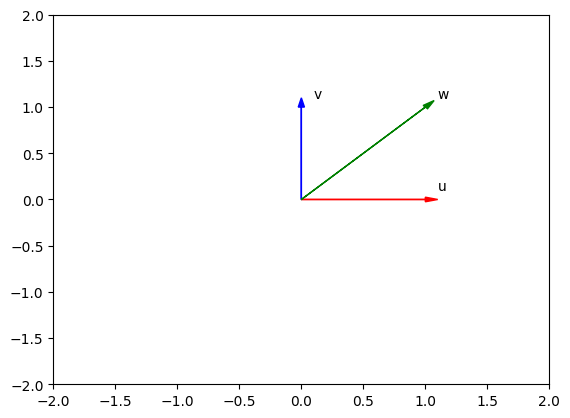

In [46]:
# Plot u, v, w

plotVec([
    {"vector": u.numpy(), "name": 'u', "color": 'r'},
    {"vector": v.numpy(), "name": 'v', "color": 'b'},
    {"vector": w.numpy(), "name": 'w', "color": 'g'}
])

In [47]:
# tensor + scalar

u = torch.tensor([1, 2, 3, -1])
v = u + 1
print ("Addition Result: ", v)

Addition Result:  tensor([2, 3, 4, 0])


The result is simply adding 1 to each element in tensor u as shown in the following image:

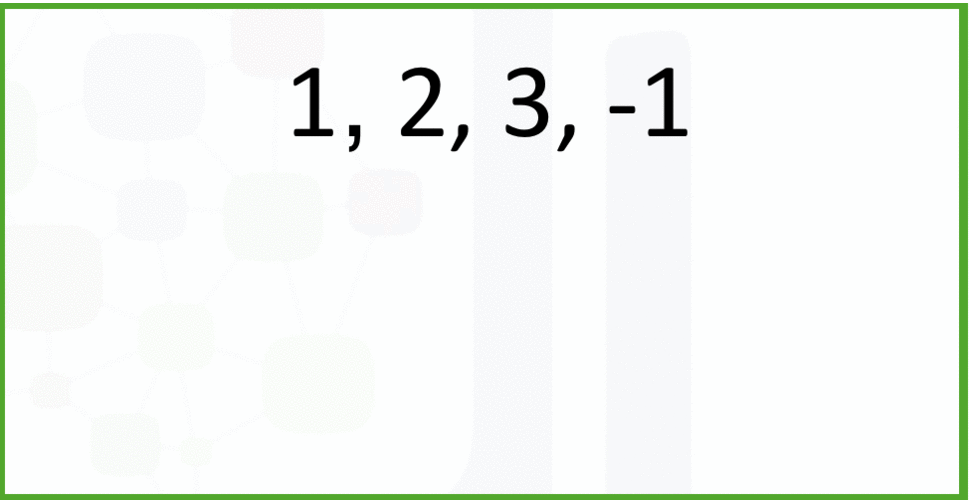

- **Tensor Multiplication**
- Now, you'll review the multiplication between a tensor and a scalar.

- Create a tensor with value [1, 2] and then multiply it by 2:

In [48]:
# tensor * scalar

u = torch.tensor([1, 2])
v = 2 * u
print("The result of 2 * u: ", v)

The result of 2 * u:  tensor([2, 4])


The result is tensor([2, 4]), so the code 2 * u multiplies each element in the tensor by 2. This is how you get the product between a vector or matrix and a scalar in linear algebra.

You can use multiplication between two tensors.







Create two tensors u and v and then multiply them together:

In [49]:
# tensor * tensor

u = torch.tensor([1, 2])
v = torch.tensor([3, 2])
w = u * v
print ("The result of u * v", w)

The result of u * v tensor([3, 4])



The result is simply tensor([3, 4]). This result is achieved by multiplying every element in u with the corresponding element in the same position v, which is similar to [1 * 3, 2 * 2].

-- **Dot Product**
- The dot product is a special operation for a vector that you can use in Torch.







Here is the dot product of the two tensors u and v:

In [50]:
# Calculate dot product of u, v

u = torch.tensor([1, 2])
v = torch.tensor([3, 2])

print("Dot Product of u, v:", torch.dot(u,v))

Dot Product of u, v: tensor(7)
